In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
## for data
import numpy as np
import pandas as pd## for plotting
import matplotlib.pyplot as plt
import seaborn as sns## for geospatial
import folium
import geopy## for machine learning
from sklearn import preprocessing, cluster
import scipy## for deep learning
from sklearn.cluster import DBSCAN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks H-Farm/data_with_neighbours_final_with_cluster.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df['hour'] = df['started_at'].dt.strftime('%H')
new_hour = {"hour": {'00':'Night','01':'Night','02': 'Night','03': 'Night','04': 'Night','05': 'Night','06': 'Morning','07': 'Morning','08': 'Morning','09': 'Morning','10': 'Morning','11': 'Morning','12': 'Afternoon','13': 'Afternoon','14': 'Afternoon','15': 'Afternoon','16': 'Afternoon','17': 'Afternoon','18': 'Evening','19': 'Evening','20': 'Evening','21': 'Evening','22': 'Evening','23': 'Evening'}}
df = df.replace(new_hour)

In [ ]:
df['day'] = df['started_at'].dt.dayofweek
new_day = {"day": {0:'Week_day',1:'Week_day',2: 'Week_day',3: 'Week_day',4: 'Week_day',5: 'Week_end',6: 'Week_end'}}
df = df.replace(new_day)


In [ ]:
df['Duration_log'] = np.log(df['Duration'])

In [ ]:
df

,Unnamed: 0,rideable_type,Date time,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Duration,closest distrect from start,closest distrect from end,Start district name,Start district latitude,Start district longitudine,End district name,End district latitude,End district longitudine,Start count,End count,closest distrect from start copy,closest distrect from end copy,hour,day,Duration_log
0,0,electric_bike,02/01/2021 00:00:00,2021-02-01 00:30:35,2021-02-01 01:27:41,11th & Kenyon St NW,31102,Georgia Ave & Piney Branch Rd NW,31414,38.929544,-77.027860,38.967577,-77.028057,member,-0.7,-0.7,-0.7,-6.9,NaN,0.0,0.00,4.02,25.3,21,NaN,6.5,100.0,90.20,Overcast,3426.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Night,Week_day,8.139149
1,1,classic_bike,02/01/2021 08:00:00,2021-02-01 08:54:39,2021-02-01 09:05:12,14th & Girard St NW,31123,14th St Heights / 14th & Crittenden St NW,31402,38.925284,-77.032375,38.947774,-77.032818,member,-1.6,-1.6,-1.6,-8.2,NaN,0.0,0.17,5.35,26.5,333,NaN,7.1,100.0,88.99,Snow,633.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Morning,Week_day,6.450470
2,2,classic_bike,02/01/2021 14:00:00,2021-02-01 14:53:52,2021-02-01 15:12:03,14th & Harvard St NW,31105,Georgia & New Hampshire Ave NW,31400,38.926800,-77.032200,38.936684,-77.024181,casual,0.0,0.0,0.0,-5.7,NaN,0.0,0.06,5.68,23.4,340,NaN,6.6,100.0,88.72,Snow,1091.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.994850
3,3,electric_bike,02/01/2021 15:00:00,2021-02-01 15:07:54,2021-02-01 15:12:46,14th & Irving St NW,31124,NaN,NaN,38.928717,-77.032217,38.940000,-77.020000,member,0.5,0.5,0.5,-4.9,NaN,0.0,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,292.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,5.676754
4,4,electric_bike,02/01/2021 15:00:00,2021-02-01 15:13:33,2021-02-01 15:21:13,Park Rd & Holmead Pl NW,31602,NaN,NaN,38.930746,-77.031286,38.950000,-77.020000,casual,0.5,0.5,0.5,-4.9,NaN,0.0,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,460.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.131226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457499,465428,classic_bike,04/25/2021 15:00:00,2021-04-25 15:19:12,2021-04-25 16:06:25,Jefferson Dr & 14th St SW,31247,Mt Vernon Trail & S. Washington St.,31929,38.888553,-77.032427,38.793065,-77.049436,member,18.3,18.3,18.3,NaN,NaN,0.0,0.00,0.00,22.6,310,44.8,16.0,84.2,50.29,Overcast,2833.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_end,7.949091
457500,465429,classic_bike,04/26/2021 12:00:00,2021-04-26 12:17:46,2021-04-26 12:59:34,Jefferson Memorial,31249,Prince St & Union St,31041,38.879819,-77.037413,38.803124,-77.040363,casual,15.5,15.5,15.5,NaN,NaN,0.0,0.00,0.00,22.1,311,36.9,16.0,0.0,23.62,Clear,2508.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_day,7.827241
457501,465430,electric_bike,04/27/2021 11:00:00,2021-04-27 11:32:38,2021-04-27 11:57:15,Jefferson Memorial,31249,Prince St & Union St,31041,38.879786,-77.037337,38.803253,-77.040232,casual,19.0,19.0,19.0,NaN,NaN,0.0,0.00,0.00,10.8,170,NaN,16.0,79.3,50.09,Overcast,1477.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Morning,

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,rideable_type,Date time,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Duration,closest distrect from start,closest distrect from end,Start district name,Start district latitude,Start district longitudine,End district name,End district latitude,End district longitudine,Start count,End count,closest distrect from start copy,closest distrect from end copy,hour,day,Duration_log
0,electric_bike,02/01/2021 00:00:00,2021-02-01 00:30:35,2021-02-01 01:27:41,11th & Kenyon St NW,31102,Georgia Ave & Piney Branch Rd NW,31414,38.929544,-77.027860,38.967577,-77.028057,member,-0.7,-0.7,-0.7,-6.9,NaN,0.0,0.00,4.02,25.3,21,NaN,6.5,100.0,90.20,Overcast,3426.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Night,Week_day,8.139149
1,classic_bike,02/01/2021 08:00:00,2021-02-01 08:54:39,2021-02-01 09:05:12,14th & Girard St NW,31123,14th St Heights / 14th & Crittenden St NW,31402,38.925284,-77.032375,38.947774,-77.032818,member,-1.6,-1.6,-1.6,-8.2,NaN,0.0,0.17,5.35,26.5,333,NaN,7.1,100.0,88.99,Snow,633.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Morning,Week_day,6.450470
2,classic_bike,02/01/2021 14:00:00,2021-02-01 14:53:52,2021-02-01 15:12:03,14th & Harvard St NW,31105,Georgia & New Hampshire Ave NW,31400,38.926800,-77.032200,38.936684,-77.024181,casual,0.0,0.0,0.0,-5.7,NaN,0.0,0.06,5.68,23.4,340,NaN,6.6,100.0,88.72,Snow,1091.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.994850
3,electric_bike,02/01/2021 15:00:00,2021-02-01 15:07:54,2021-02-01 15:12:46,14th & Irving St NW,31124,NaN,NaN,38.928717,-77.032217,38.940000,-77.020000,member,0.5,0.5,0.5,-4.9,NaN,0.0,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,292.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,5.676754
4,electric_bike,02/01/2021 15:00:00,2021-02-01 15:13:33,2021-02-01 15:21:13,Park Rd & Holmead Pl NW,31602,NaN,NaN,38.930746,-77.031286,38.950000,-77.020000,casual,0.5,0.5,0.5,-4.9,NaN,0.0,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,460.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.131226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457499,classic_bike,04/25/2021 15:00:00,2021-04-25 15:19:12,2021-04-25 16:06:25,Jefferson Dr & 14th St SW,31247,Mt Vernon Trail & S. Washington St.,31929,38.888553,-77.032427,38.793065,-77.049436,member,18.3,18.3,18.3,NaN,NaN,0.0,0.00,0.00,22.6,310,44.8,16.0,84.2,50.29,Overcast,2833.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_end,7.949091
457500,classic_bike,04/26/2021 12:00:00,2021-04-26 12:17:46,2021-04-26 12:59:34,Jefferson Memorial,31249,Prince St & Union St,31041,38.879819,-77.037413,38.803124,-77.040363,casual,15.5,15.5,15.5,NaN,NaN,0.0,0.00,0.00,22.1,311,36.9,16.0,0.0,23.62,Clear,2508.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_day,7.827241
457501,electric_bike,04/27/2021 11:00:00,2021-04-27 11:32:38,2021-04-27 11:57:15,Jefferson Memorial,31249,Prince St & Union St,31041,38.879786,-77.037337,38.803253,-77.040232,casual,19.0,19.0,19.0,NaN,NaN,0.0,0.00,0.00,10.8,170,NaN,16.0,79.3,50.09,Overcast,1477.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Morning,Week_day,7.297768
457502,classic_bike,04/30/20

In [ ]:
np.where(df.isna()['start_lat']==1),np.where(df.isna()['start_lng']==1)

((array([67997]),), (array([67997]),))

In [ ]:
df.dropna(subset = ['end_lat', 'start_lat'], inplace = True)


In [ ]:
df

,rideable_type,Date time,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Duration,closest distrect from start,closest distrect from end,Start district name,Start district latitude,Start district longitudine,End district name,End district latitude,End district longitudine,Start count,End count,closest distrect from start copy,closest distrect from end copy,hour,day,Duration_log
0,electric_bike,02/01/2021 00:00:00,2021-02-01 00:30:35,2021-02-01 01:27:41,11th & Kenyon St NW,31102,Georgia Ave & Piney Branch Rd NW,31414,38.929544,-77.027860,38.967577,-77.028057,member,-0.7,-0.7,-0.7,-6.9,NaN,0.0,0.00,4.02,25.3,21,NaN,6.5,100.0,90.20,Overcast,3426.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Night,Week_day,8.139149
1,classic_bike,02/01/2021 08:00:00,2021-02-01 08:54:39,2021-02-01 09:05:12,14th & Girard St NW,31123,14th St Heights / 14th & Crittenden St NW,31402,38.925284,-77.032375,38.947774,-77.032818,member,-1.6,-1.6,-1.6,-8.2,NaN,0.0,0.17,5.35,26.5,333,NaN,7.1,100.0,88.99,Snow,633.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Morning,Week_day,6.450470
2,classic_bike,02/01/2021 14:00:00,2021-02-01 14:53:52,2021-02-01 15:12:03,14th & Harvard St NW,31105,Georgia & New Hampshire Ave NW,31400,38.926800,-77.032200,38.936684,-77.024181,casual,0.0,0.0,0.0,-5.7,NaN,0.0,0.06,5.68,23.4,340,NaN,6.6,100.0,88.72,Snow,1091.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.994850
3,electric_bike,02/01/2021 15:00:00,2021-02-01 15:07:54,2021-02-01 15:12:46,14th & Irving St NW,31124,NaN,NaN,38.928717,-77.032217,38.940000,-77.020000,member,0.5,0.5,0.5,-4.9,NaN,0.0,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,292.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,5.676754
4,electric_bike,02/01/2021 15:00:00,2021-02-01 15:13:33,2021-02-01 15:21:13,Park Rd & Holmead Pl NW,31602,NaN,NaN,38.930746,-77.031286,38.950000,-77.020000,casual,0.5,0.5,0.5,-4.9,NaN,0.0,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,460.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.131226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457499,classic_bike,04/25/2021 15:00:00,2021-04-25 15:19:12,2021-04-25 16:06:25,Jefferson Dr & 14th St SW,31247,Mt Vernon Trail & S. Washington St.,31929,38.888553,-77.032427,38.793065,-77.049436,member,18.3,18.3,18.3,NaN,NaN,0.0,0.00,0.00,22.6,310,44.8,16.0,84.2,50.29,Overcast,2833.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_end,7.949091
457500,classic_bike,04/26/2021 12:00:00,2021-04-26 12:17:46,2021-04-26 12:59:34,Jefferson Memorial,31249,Prince St & Union St,31041,38.879819,-77.037413,38.803124,-77.040363,casual,15.5,15.5,15.5,NaN,NaN,0.0,0.00,0.00,22.1,311,36.9,16.0,0.0,23.62,Clear,2508.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_day,7.827241
457501,electric_bike,04/27/2021 11:00:00,2021-04-27 11:32:38,2021-04-27 11:57:15,Jefferson Memorial,31249,Prince St & Union St,31041,38.879786,-77.037337,38.803253,-77.040232,casual,19.0,19.0,19.0,NaN,NaN,0.0,0.00,0.00,10.8,170,NaN,16.0,79.3,50.09,Overcast,1477.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Morning,Week_day,7.297768
457502,classic_bike,04/30/20

In [ ]:
coords = df[["start_lat","start_lng"]].values
coords

array([[ 38.92954433, -77.02785967],
       [ 38.925284  , -77.032375  ],
       [ 38.9268    , -77.0322    ],
       ...,
       [ 38.87978567, -77.037337  ],
       [ 38.879819  , -77.037413  ],
       [ 38.88880183, -77.02857267]])

In [ ]:
db = DBSCAN( eps = 0.005,algorithm='ball_tree', metric='haversine').fit(coords)

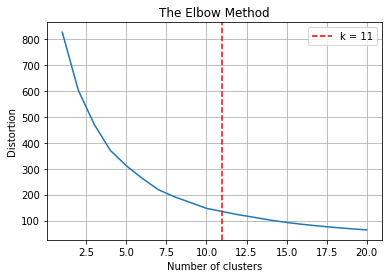

In [ ]:
X = df[["start_lat","start_lng"]]
max_k = 20## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=800, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [ ]:
k = 10
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = df[["start_lat","start_lng"]]## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1## add clustering info to the original dataset
df[["cluster_start","centroids"]] = dtf_X[["cluster","centroids"]]
df.sample(6)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,rideable_type,Date time,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Duration,closest distrect from start,closest distrect from end,Start district name,Start district latitude,Start district longitudine,End district name,End district latitude,End district longitudine,Start count,End count,closest distrect from start copy,closest distrect from end copy,hour,day,Duration_log,cluster_start,centroids
337008,electric_bike,04/30/2021 12:00:00,2021-04-30 12:46:07,2021-04-30 13:41:37,3rd & Tingey St SE,31634,3rd & M St NE,31627,38.874887,-77.002479,38.905452,-77.002133,member,20.6,20.6,20.6,NaN,NaN,0.0,0.0,0.0,36.3,306,74.8,16.0,82.3,31.93,Overcast,3330.0,4,16,Capitol Riverfront,38.877642,-76.996116,NoMa,38.904225,-77.005944,21902,29968,skirt2,skirt2,Afternoon,Week_day,8.110728,2,0
287488,classic_bike,03/03/2021 15:00:00,2021-03-03 15:03:36,2021-03-03 16:06:38,Friendship Blvd & Willard Ave,32040,Friendship Blvd & Willard Ave,32040,38.961150,-77.088659,38.961150,-77.088659,casual,15.5,15.5,15.5,NaN,NaN,0.0,0.0,0.0,11.3,260,25.9,16.0,0.0,20.28,Clear,3782.0,22,22,Alto nord-west,38.923738,-77.074204,Alto nord-west,38.923738,-77.074204,14864,12718,outskirt,outskirt,Afternoon,Week_day,8.238008,9,0
303723,classic_bike,04/17/2021 19:00:00,2021-04-17 19:56:25,2021-04-17 19:59:21,New Jersey Ave & N St NW/Dunbar HS,31636,New Jersey Ave & R St NW,31509,38.907333,-77.015360,38.912659,-77.017669,member,14.3,14.3,14.3,NaN,NaN,0.0,0.0,0.0,16.3,319,NaN,16.0,79.3,45.95,Overcast,176.0,14,19,Mount Vernon Square,38.905186,-77.021949,Shaw,38.912577,-77.022906,22835,11852,skirt1,skirt1,Evening,Week_end,5.170484,4,0
309424,electric_bike,03/22/2021 14:00:00,2021-03-22 14:19:07,2021-03-22 14:45:08,NaN,NaN,1st & Rhode Island Ave NW,31506,38.940000,-77.060000,38.915305,-77.012311,member,17.1,17.1,17.1,NaN,NaN,0.0,0.0,0.0,9.6,54,NaN,16.0,0.0,34.00,Clear,1561.0,23,19,Woodley Park,38.927572,-77.057730,Shaw,38.912577,-77.022906,7057,11852,outskirt,skirt1,Afternoon,Week_day,7.353082,9,0
133264,classic_bike,04/03/2021 19:00:00,2021-04-03 19:04:24,2021-04-03 20:48:53,Lincoln Memorial,31258,10th St & Constitution Ave NW,31219,38.888255,-77.049437,38.893028,-77.026013,casual,12.1,12.1,12.1,NaN,NaN,0.0,0.0,0.0,11.0,236,NaN,16.0,24.4,20.50,Clear,6269.0,24,17,Virginia,38.886159,-77.058466,Penn Quarter e Chinatown,38.897226,-77.023387,36131,21031,outskirt,skirt1,Evening,Week_end,8.743372,0,0
85400,classic_bike,04/29/2021 18:00:00,2021-04-29 18:43:47,2021-04-29 18:58:43,5th St & Massachusetts Ave NW,31265,20th & O St NW / Dupont South,31234,38.900930,-77.018677,38.908905,-77.044780,member,27.7,27.7,27.7,NaN,28.1,0.0,0.0,0.0,25.6,190,NaN,16.0,92.1,49.30,Overcast,896.0,14,8,Mount Vernon Square,38.905186,-77.021949,Dupont Circle,38.910011,-77.043656,22835,22867,skirt1,downtown,Evening,Week_day,6.797940,4,0


/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


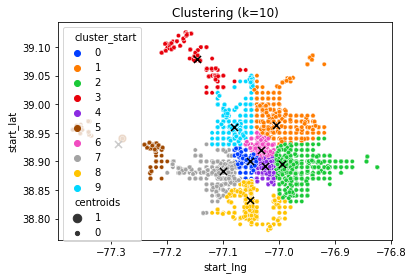

In [ ]:
## plot
fig, ax = plt.subplots()
sns.scatterplot(x="start_lng", y="start_lat", data=df, 
                palette=sns.color_palette("bright",k),
                hue='cluster_start', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
              
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,1], th_centroids[:,0], s=50, c='black', 
           marker="x")

In [ ]:
df_final

,rideable_type,Date time,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,Duration,closest distrect from start,closest distrect from end,Start district name,Start district latitude,Start district longitudine,End district name,End district latitude,End district longitudine,Start count,End count,closest distrect from start copy,closest distrect from end copy,hour,day,Duration_log,cluster_start,centroids,cluster_end
0,electric_bike,02/01/2021 00:00:00,2021-02-01 00:30:35,2021-02-01 01:27:41,11th & Kenyon St NW,31102,Georgia Ave & Piney Branch Rd NW,31414,38.929544,-77.027860,38.967577,-77.028057,member,-0.7,-0.7,-0.7,-6.9,NaN,0.0,0.00,4.02,25.3,21,NaN,6.5,100.0,90.20,Overcast,3426.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Night,Week_day,8.139149,6,0,2
1,classic_bike,02/01/2021 08:00:00,2021-02-01 08:54:39,2021-02-01 09:05:12,14th & Girard St NW,31123,14th St Heights / 14th & Crittenden St NW,31402,38.925284,-77.032375,38.947774,-77.032818,member,-1.6,-1.6,-1.6,-8.2,NaN,0.0,0.17,5.35,26.5,333,NaN,7.1,100.0,88.99,Snow,633.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Morning,Week_day,6.450470,6,0,6
2,classic_bike,02/01/2021 14:00:00,2021-02-01 14:53:52,2021-02-01 15:12:03,14th & Harvard St NW,31105,Georgia & New Hampshire Ave NW,31400,38.926800,-77.032200,38.936684,-77.024181,casual,0.0,0.0,0.0,-5.7,NaN,0.0,0.06,5.68,23.4,340,NaN,6.6,100.0,88.72,Snow,1091.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.994850,6,0,6
3,electric_bike,02/01/2021 15:00:00,2021-02-01 15:07:54,2021-02-01 15:12:46,14th & Irving St NW,31124,NaN,NaN,38.928717,-77.032217,38.940000,-77.020000,member,0.5,0.5,0.5,-4.9,NaN,0.0,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,292.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,5.676754,6,0,6
4,electric_bike,02/01/2021 15:00:00,2021-02-01 15:13:33,2021-02-01 15:21:13,Park Rd & Holmead Pl NW,31602,NaN,NaN,38.930746,-77.031286,38.950000,-77.020000,casual,0.5,0.5,0.5,-4.9,NaN,0.0,0.06,5.74,22.6,339,40.7,4.1,99.3,87.82,Snow,460.0,5,18,Columbia Heights,38.928882,-77.029778,Petworth,38.942670,-77.025281,27945,16781,skirt2,outskirt,Afternoon,Week_day,6.131226,6,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457499,classic_bike,04/25/2021 15:00:00,2021-04-25 15:19:12,2021-04-25 16:06:25,Jefferson Dr & 14th St SW,31247,Mt Vernon Trail & S. Washington St.,31929,38.888553,-77.032427,38.793065,-77.049436,member,18.3,18.3,18.3,NaN,NaN,0.0,0.00,0.00,22.6,310,44.8,16.0,84.2,50.29,Overcast,2833.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_end,7.949091,1,0,5
457500,classic_bike,04/26/2021 12:00:00,2021-04-26 12:17:46,2021-04-26 12:59:34,Jefferson Memorial,31249,Prince St & Union St,31041,38.879819,-77.037413,38.803124,-77.040363,casual,15.5,15.5,15.5,NaN,NaN,0.0,0.00,0.00,22.1,311,36.9,16.0,0.0,23.62,Clear,2508.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-76.995403,26742,9742,skirt2,outskirt,Afternoon,Week_day,7.827241,1,0,5
457501,electric_bike,04/27/2021 11:00:00,2021-04-27 11:32:38,2021-04-27 11:57:15,Jefferson Memorial,31249,Prince St & Union St,31041,38.879786,-77.037337,38.803253,-77.040232,casual,19.0,19.0,19.0,NaN,NaN,0.0,0.00,0.00,10.8,170,NaN,16.0,79.3,50.09,Overcast,1477.0,15,6,National Mall,38.887398,-77.036415,Congress Heights,38.842997,-7

In [ ]:
df_final.to_csv('/content/drive/MyDrive/Colab Notebooks H-Farm/merged_data_encoded_with_clustered_kmeans_district_final.csv')